In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from numpy import std
import scipy as sc

In [ ]:
import seaborn as sns
sns.set_theme()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [ ]:
 df_clean = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/covid_detect_clean.xlsx')
 df_clean.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,58,4.2,245.0,3.3,0.6,0.3,0.0,0.0,167.6,25.0,23.0,NaN,NaN,190.0,1
1,M,65,10.1,229.0,NaN,NaN,NaN,NaN,NaN,234.2,57.0,17.0,NaN,NaN,565.0,1
2,M,46,9.4,191.0,7.3,1.3,0.7,0.0,0.0,82.1,55.0,64.0,100.0,107.0,308.0,1
3,M,84,16.6,228.0,NaN,NaN,NaN,NaN,NaN,143.5,38.0,39.0,84.0,26.0,210.0,1
4,M,40,5.2,186.0,4.0,0.7,0.5,0.0,0.0,98.7,50.0,56.0,59.0,81.0,324.0,1


## Correlation

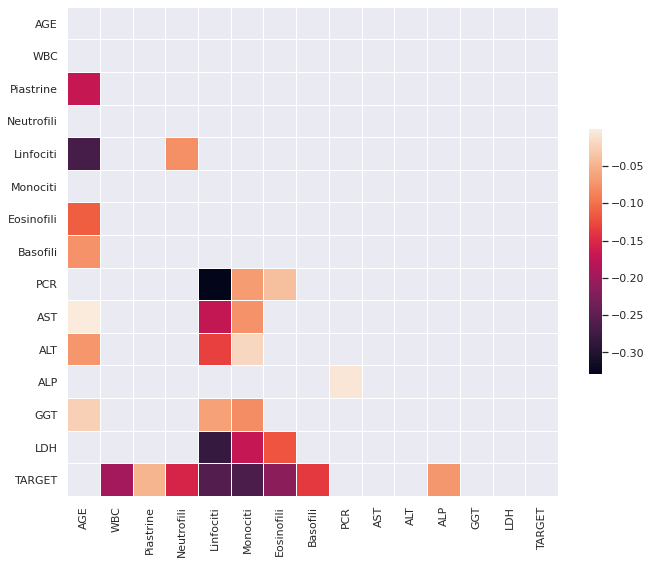

In [ ]:
plt.figure(figsize=(11,9))
mask = np.triu(np.ones_like(df_clean.corr(), dtype=bool))
sns.heatmap(df_clean.corr()[df_clean.corr() < 0], mask=mask, cmap='rocket', cbar_kws={"shrink": .5}, linewidths=.01);

In [ ]:
df_mort = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/mortality.xlsx')
df_mort.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,73,9.67,141.0,6.23,2.50,0.76,0.16,0.02,2.6,23.0,30.0,71.0,41.0,206.0,0
1,M,61,10.37,283.0,8.79,0.95,0.59,0.01,0.03,27.4,15.0,22.0,45.0,50.0,282.0,0
2,F,70,7.68,238.0,5.09,2.10,0.47,0.01,0.01,3.6,20.0,67.0,69.0,53.0,226.0,0
3,M,74,6.78,300.0,4.89,1.12,0.58,0.17,0.02,14.5,28.0,26.0,79.0,14.0,249.0,0
4,F,29,7.95,356.0,5.20,1.88,0.59,0.24,0.04,0.8,13.0,18.0,84.0,21.0,179.0,0


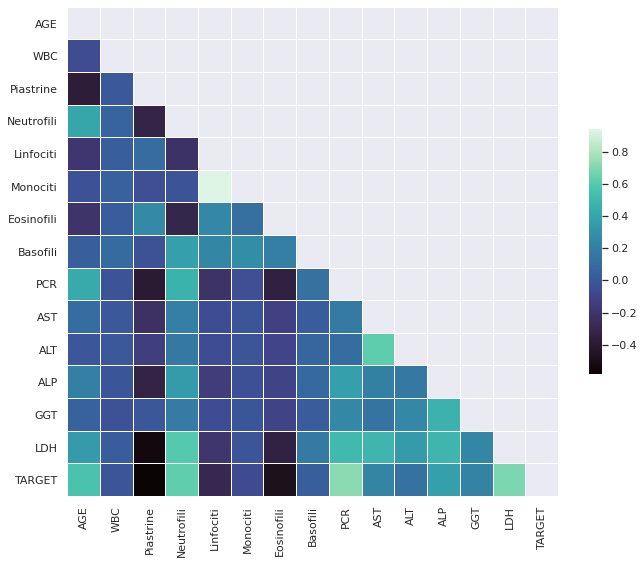

In [ ]:
plt.figure(figsize=(11,9))
mask = np.triu(np.ones_like(df_mort.corr(), dtype=bool))
sns.heatmap(df_mort.corr(), mask=mask, cmap='mako', cbar_kws={"shrink": .5}, linewidths=.01);

In [ ]:
def list_corr(df, type='pearson', asc=False):
    df_corr = df.corr(type)
    df_corr_list = pd.DataFrame( columns = ['Item-1', 'Item-2', type])
    s = 0
    L = []
    for i in df_corr.columns:
        for j in df_corr.columns:
            if (set({i,j}) not in L) and (i!=j):
                L.append(set({i,j}))
                df_corr_list.loc[s] = [i, j, df_corr.loc[i,j]]
                s +=1
    return df_corr_list.sort_values(type, ascending=asc)


In [ ]:
list_corr(df_clean, type='pearson', asc=False)

,Item-1,Item-2,pearson
15,WBC,Neutrofili,0.949853
99,ALP,GGT,0.831245
90,AST,ALT,0.744532
92,AST,GGT,0.659550
93,AST,LDH,0.585055
...,...,...,...
59,Linfociti,TARGET,-0.257413
68,Monociti,TARGET,-0.264875
3,AGE,Linfociti,-0.268108
58,Linfociti,LDH,-0.281676


#Decision Tree Visualization

In [ ]:
import xgboost

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from numpy import std

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import resample

import scipy as sc

In [ ]:
imp_mean = IterativeImputer(random_state=0, max_iter=10000)
df_iter = imp_mean.fit_transform(df_clean.iloc[:,1:-1].values)
df_target = df_clean.iloc[:,-1].values

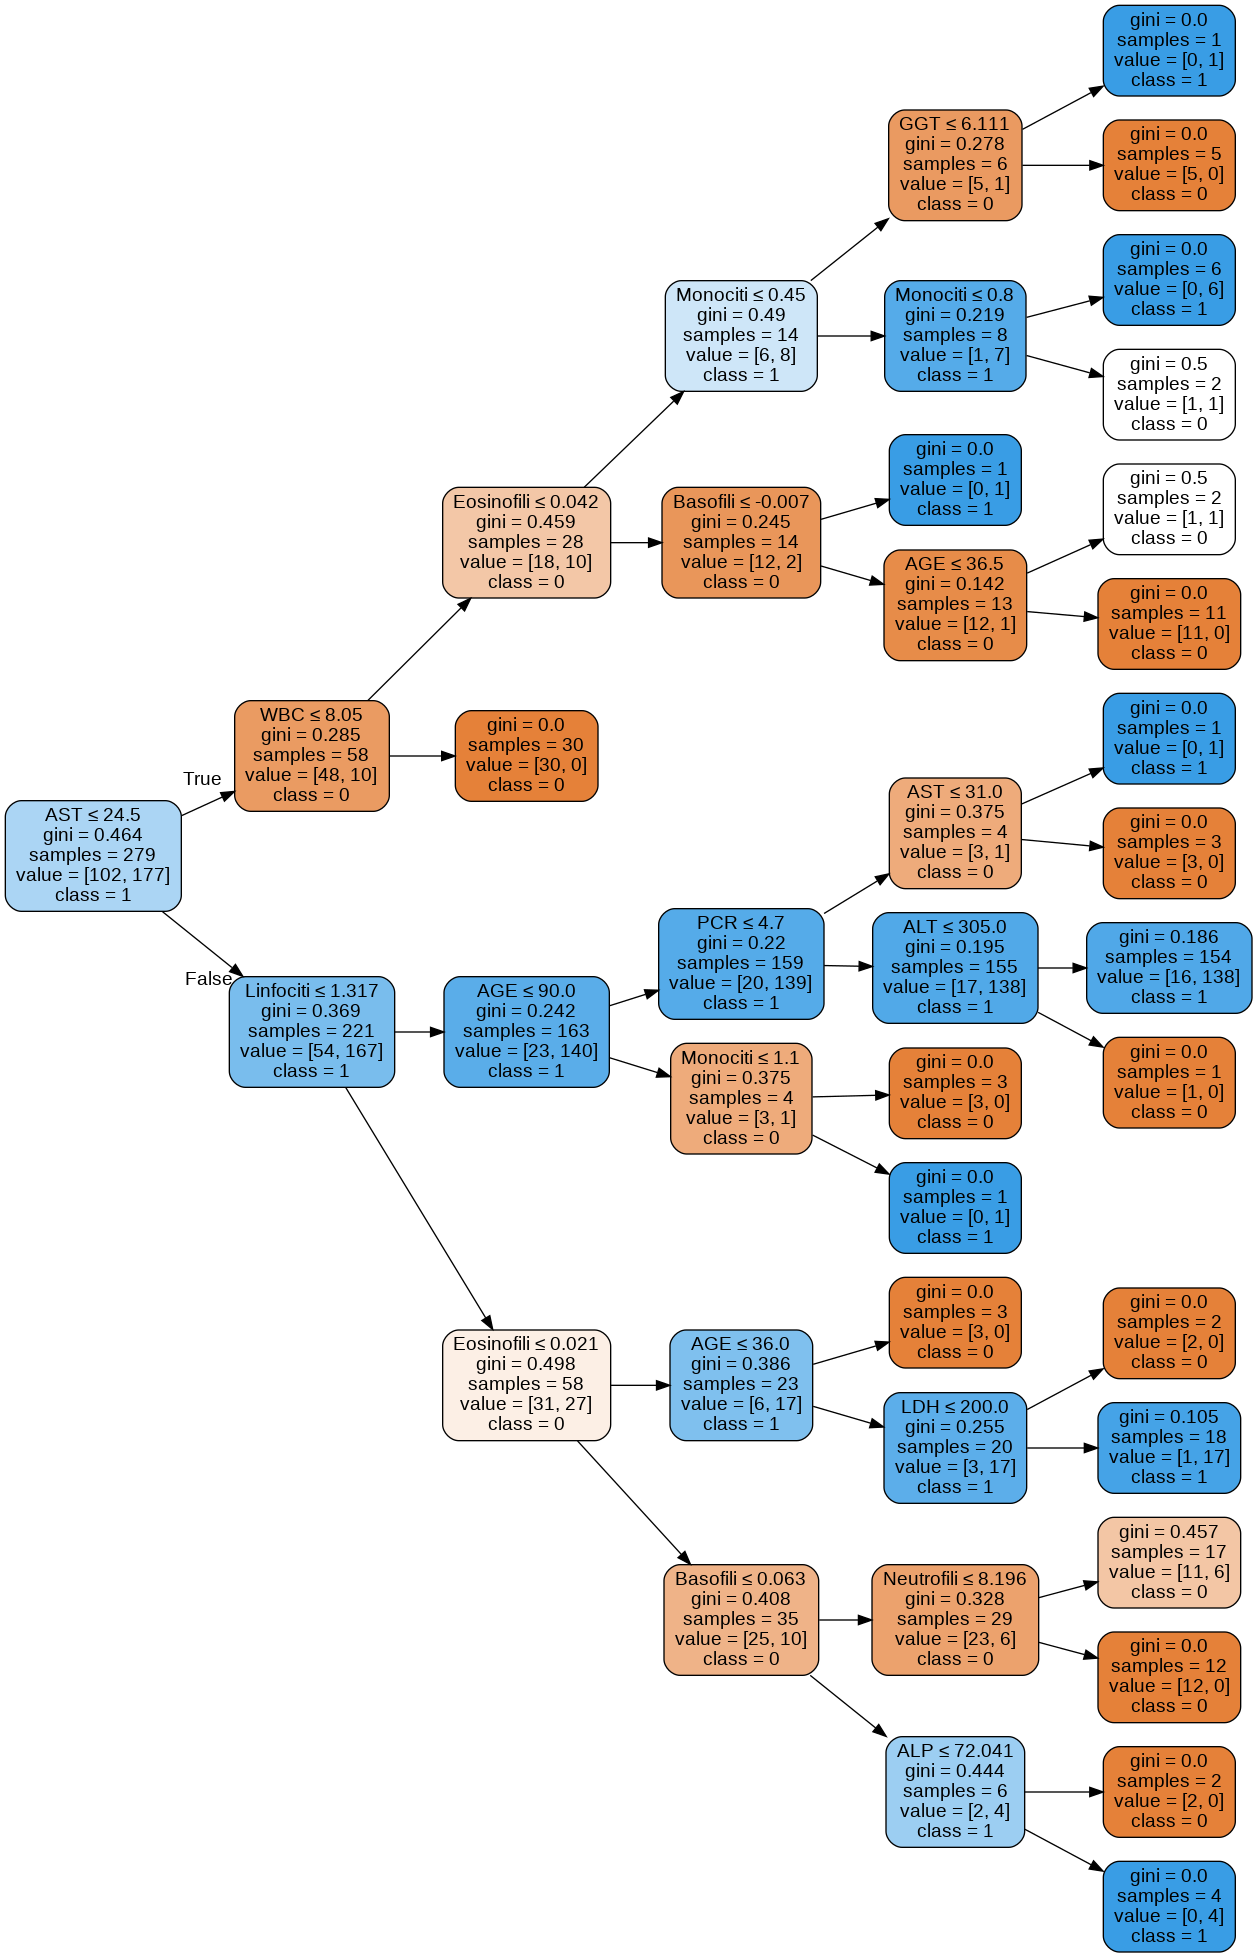

In [ ]:
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
import pydotplus

# max_depth [2,3]
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(df_iter, df_target)

dot_data = tree.export_graphviz(dt, out_file=None,
                         feature_names=df_clean.iloc[:,1:-1].columns,
                         class_names=['0', '1'],
                         filled=True, rounded=True,
                         special_characters=True,
                         rotate=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# use dt to compare motrality and detection
# import mortality and check the score of mort

In [ ]:
df_mort = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/mortality.xlsx')
df_mort.head()

Xm = df_mort.iloc[:,1:-1].values
ym = df_mort.iloc[:,-1].values

dt.score(Xm, [1]*Xm.shape[0])

ValueError: ignored

In [ ]:
import seaborn as sns

In [ ]:
# # Only use this after finding the top 5 features
sns.set()
data = df_clean[['LDH', 'AST', 'WBC', 'Linfociti', 'PCR', 'TARGET']]
sns.pairplot(data=data, hue='TARGET')